<a href="https://colab.research.google.com/github/ada-nai/nptel-PMLTF/blob/master/Week%206/TF__Assignment_6_Estimators.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Setup**

Install and import all the necessary libraries for the assignment.

In [0]:
!pip install tensorflow==2.0.0-rc0

from sklearn.model_selection import train_test_split
from sklearn.datasets import load_boston
import tensorflow as tf
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns_colors = sns.color_palette('colorblind')

tf.random.set_seed(1)

### **Importing the dataset**

In [0]:
boston_dataset = load_boston()

data_X = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
data_Y = pd.DataFrame(boston_dataset.target, columns=["target"])
data = pd.concat([data_X, data_Y], axis=1)

In [0]:
data_X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [0]:
train, test = train_test_split(data, test_size=0.2, random_state=1)
print(len(train), "train examples")
print(len(test), "test examples")

404 train examples
102 test examples


In [0]:
type(train)
train.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
42,0.14150,0.0,6.91,0.0,0.448,6.169,6.6,5.7209,3.0,233.0,17.9,383.37,5.81,25.3
58,0.15445,25.0,5.13,0.0,0.453,6.145,29.2,7.8148,8.0,284.0,19.7,390.68,6.86,23.3
385,16.81180,0.0,18.10,0.0,0.700,5.277,98.1,1.4261,24.0,666.0,20.2,396.90,30.81,7.2
78,0.05646,0.0,12.83,0.0,0.437,6.232,53.7,5.0141,5.0,398.0,18.7,386.40,12.34,21.2
424,8.79212,0.0,18.10,0.0,0.584,5.565,70.6,2.0635,24.0,666.0,20.2,3.65,17.16,11.7


In [0]:
train.keys()

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'target'],
      dtype='object')

Converting the Pandas DataFrames into Tensorflow Datasets

In [0]:
def df_to_dataset(dataframe, shuffle_and_repeat=True, batch_size=32):
  dataframe = dataframe.copy()
  labels = dataframe.pop('target')
  ds = tf.data.Dataset.from_tensor_slices((dict(dataframe), labels))
  if shuffle_and_repeat:
    ds = ds.shuffle(buffer_size=len(dataframe))
    ds = ds.repeat()
    
  ds = ds.batch(batch_size)
  
  return ds

### Defining Feature Columns

In [0]:
train.keys()

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'target'],
      dtype='object')

In [0]:
# define feature_columns as a list of all the features as numeric columns using functions from tf.feature_column
feature_columns = []
for key in data_X.keys():
  feature_columns.append(tf.feature_column.numeric_column(key))

feature_columns


[NumericColumn(key='CRIM', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='ZN', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='INDUS', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='CHAS', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='NOX', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='RM', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='AGE', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='DIS', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='RAD', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='TAX', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='PTRATIO'

### Building the model

In [0]:
config = tf.estimator.RunConfig(tf_random_seed=1)


# Build the model using tf.estimator and pass as config variable to the config parameter of the estimator
regressor = tf.estimator.BoostedTreesRegressor(feature_columns = feature_columns,n_batches_per_layer = 1,center_bias = True, config = config)

INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmpb451gh52', '_tf_random_seed': 1, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f5a1b1a6d30>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


Train the model by using the df_to_dataset function. Batch size should be 32. Note that while training the model, the shuffle_and_repeat parameter of the df_to_dataset function should be set to True.

In [0]:
# Train the model
regressor.train(
    input_fn=lambda: df_to_dataset(train),
    steps=50)


INFO:tensorflow:Calling model_fn.
Instructions for updating:
The old _FeatureColumn APIs are being deprecated. Please use the new FeatureColumn APIs instead.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
Type is unsupported, or the types of the items don't match field type in CollectionDef. Note this is a warning and probably safe to ignore.
'_Resource' object has no attribute 'name'
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Type is unsupported, or the types of the items don't match field type in CollectionDef. Note this is a warning and probably safe to ignore.
'_Resource' object has no attribute 'name'
INFO:tensorflow:Saving checkpoints for 0 into /tmp/tmpb451gh52/model.ckpt.
Type is unsupported, or the types of the items don't match field type in CollectionDef. Note this is a warning and probably safe to ignore.
'_Resource' object has no attribute 'name'
INFO:tensorflow

In [0]:
test.head()

In [0]:
# Evaluate the model using the df_to_dataset function and the test dataframe
res = regressor.evaluate(input_fn=lambda:  df_to_dataset(test), steps = 1)


INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-10-09T13:35:05Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpb451gh52/model.ckpt-50
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [1/1]
INFO:tensorflow:Finished evaluation at 2019-10-09-13:35:06
INFO:tensorflow:Saving dict for global step 50: average_loss = 20.82193, global_step = 50, label/mean = 21.856249, loss = 20.82193, prediction/mean = 22.05843
Type is unsupported, or the types of the items don't match field type in CollectionDef. Note this is a warning and probably safe to ignore.
'_Resource' object has no attribute 'name'
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 50: /tmp/tmpb451gh52/model.ckpt-50


##Q1
loss = 32.819786
##Q2
loss = 130.06894
##Q3
Loss for final step: 74.88282. loss = 93.44302
##Q4
average_loss = 20.82193

### **Boosted Trees Interpretation**

You will need this section only for questions 5-7.

In [0]:
pred_dicts = list(regressor.experimental_predict_with_explanations(lambda: df_to_dataset(test, False, 32)))

INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmpb451gh52', '_tf_random_seed': 1, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f5a1b2c95c0>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring p

In [0]:
# Create DFC Pandas dataframe.
predictions = pd.Series([pred['predictions'][0] for pred in pred_dicts])
df_dfc = pd.DataFrame([pred['dfc'] for pred in pred_dicts])
df_dfc.describe().T

,count,mean,std,min,25%,50%,75%,max
INDUS,102.0,0.139739,0.897014,-0.996441,-0.407400,-0.266554,0.029665,2.769520
AGE,102.0,0.217938,1.947907,-4.129795,-1.186794,-0.212296,1.630661,5.430849
RM,102.0,-0.099130,1.775535,-1.526121,-1.004610,-0.849075,0.074173,6.189215
CRIM,102.0,-0.265565,0.648779,-2.593834,-0.419735,-0.104004,0.163083,2.335884
TAX,102.0,-0.049770,0.634513,-0.920506,-0.003080,-0.003080,-0.003080,2.519119
B,102.0,-0.455132,0.709151,-3.022982,-0.658524,-0.341938,-0.114628,1.126245
DIS,102.0,-0.077520,1.824816,-2.568922,-1.139078,-0.330250,0.089680,8.886751
CHAS,102.0,-0.112783,0.804965,-0.539326,-0.269123,-0.230833,-0.230833,4.468229
LSTAT,102.0,0.094689,1.843813,-2.312346,-1.041912,-0.673365,0.371132,3.780775
NOX,102.0,-0.004629,0.520999,-1.659901,-0.083914,0.127197,0.161048,0.904469


In [0]:
# Sum of DFCs + bias == probabality.
bias = pred_dicts[0]['bias']
dfc_pred = df_dfc.sum(axis=1) + bias
np.testing.assert_almost_equal(dfc_pred.values,
                               predictions.values)

In [0]:
# Boilerplate code for plotting :)
def _get_color(value):
    """To make positive DFCs plot green, negative DFCs plot red."""
    green, red = sns.color_palette()[2:4]
    if value >= 0: return green
    return red

def _add_feature_values(feature_values, ax):
    """Display feature's values on left of plot."""
    x_coord = ax.get_xlim()[0]
    OFFSET = 0.15
    for y_coord, (feat_name, feat_val) in enumerate(feature_values.items()):
        t = plt.text(x_coord, y_coord - OFFSET, '{}'.format(feat_val), size=12)
        t.set_bbox(dict(facecolor='white', alpha=0.5))
    from matplotlib.font_manager import FontProperties
    font = FontProperties()
    font.set_weight('bold')
    t = plt.text(x_coord, y_coord + 1 - OFFSET, 'feature\nvalue',
    fontproperties=font, size=12)

def plot_example(example):
  TOP_N = 8 # View top 8 features.
  sorted_ix = example.abs().sort_values()[-TOP_N:].index  # Sort by magnitude.
  example = example[sorted_ix]
  colors = example.map(_get_color).tolist()
  ax = example.to_frame().plot(kind='barh',
                          color=[colors],
                          legend=None,
                          alpha=0.75,
                          figsize=(10,6))
  ax.grid(False, axis='y')
  ax.set_yticklabels(ax.get_yticklabels(), size=14)

  # Add feature values.
  _add_feature_values(test.iloc[ID][sorted_ix], ax)
  return ax

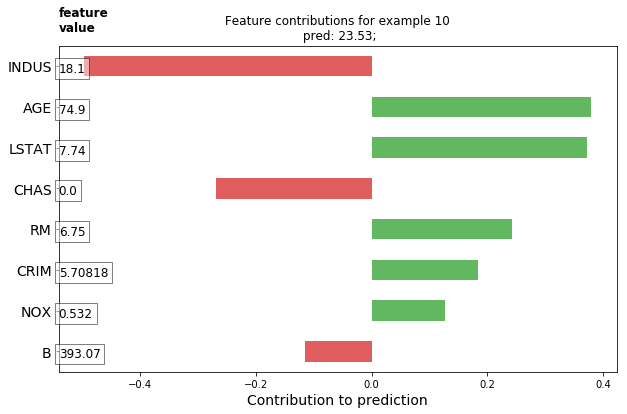

In [0]:
# Plot results.
ID = 10
example = df_dfc.iloc[ID]  # Choose ith example from evaluation set.
TOP_N = 8  # View top 8 features.
sorted_ix = example.abs().sort_values()[-TOP_N:].index
ax = plot_example(example)
ax.set_title('Feature contributions for example {}\n pred: {:1.2f};'.format(ID, predictions[ID]))
ax.set_xlabel('Contribution to prediction', size=14)
plt.show()

In [0]:
# Boilerplate plotting code.
def dist_violin_plot(df_dfc, ID):
  # Initialize plot.
  fig, ax = plt.subplots(1, 1, figsize=(10, 6))

  # Create example dataframe.
  TOP_N = 8  # View top 8 features.
  example = df_dfc.iloc[ID]
  ix = example.abs().sort_values()[-TOP_N:].index
  example = example[ix]
  example_df = example.to_frame(name='dfc')

  # Add contributions of entire distribution.
  parts=ax.violinplot([df_dfc[w] for w in ix],
                 vert=False,
                 showextrema=False,
                 widths=0.7,
                 positions=np.arange(len(ix)))
  face_color = sns_colors[0]
  alpha = 0.15
  for pc in parts['bodies']:
      pc.set_facecolor(face_color)
      pc.set_alpha(alpha)

  # Add feature values.
  _add_feature_values(test.iloc[ID][sorted_ix], ax)

  # Add local contributions.
  ax.scatter(example,
              np.arange(example.shape[0]),
              color=sns.color_palette()[2],
              s=100,
              marker="s",
              label='contributions for example')

  # Legend
  # Proxy plot, to show violinplot dist on legend.
  ax.plot([0,0], [1,1], label='eval set contributions\ndistributions',
          color=face_color, alpha=alpha, linewidth=10)
  legend = ax.legend(loc='lower right', shadow=True, fontsize='x-large',
                     frameon=True)
  legend.get_frame().set_facecolor('white')

  # Format plot.
  ax.set_yticks(np.arange(example.shape[0]))
  ax.set_yticklabels(example.index)
  ax.grid(False, axis='y')
  ax.set_xlabel('Contribution to prediction', size=14)

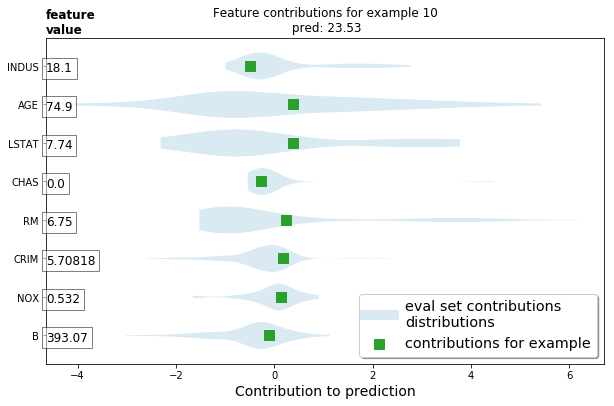

In [0]:
dist_violin_plot(df_dfc, ID)
plt.title('Feature contributions for example {}\n pred: {:1.2f}'.format(ID, predictions[ID]))
plt.show()

### Gain-based feature importances

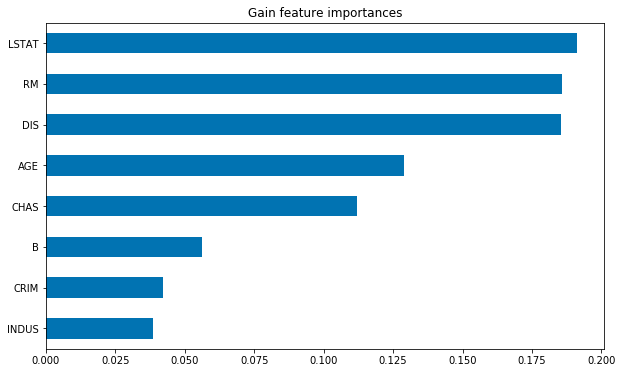

In [0]:
importances = regressor.experimental_feature_importances(normalize=True)
df_imp = pd.Series(importances)

# Visualize importances.
N = 8
ax = (df_imp.iloc[0:N][::-1]
    .plot(kind='barh',
          color=sns_colors[0],
          title='Gain feature importances',
          figsize=(10, 6)))
ax.grid(False, axis='y')

You can also see how DFCs vary as a feature value varies.

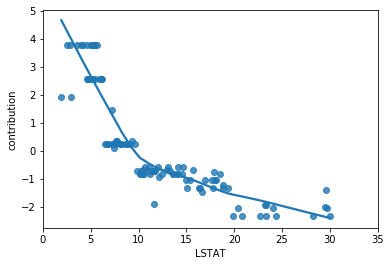

In [0]:
FEATURE = 'LSTAT'
feature = pd.Series(df_dfc[FEATURE].values, index=test[FEATURE].values).sort_index()
ax = sns.regplot(feature.index.values, feature.values, lowess=True)
ax.set_ylabel('contribution')
ax.set_xlabel(FEATURE)
ax.set_xlim(0, 35)
plt.show()